# Programming Assignment - 10
---
## Name: Samruth Vennapusala
---

In [7]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sc


from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

import time

np.random.seed(100)
%matplotlib inline

## Question 1
---
Create the sparse COO representation ( [ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix)) of the adjacency matrix (no need to find the dense representation) of the following graph. Find its CSR representation using appropriate Python function. Visualize this matrix by using spy() function. Refer to the notebook of Lecture 10 live session. 

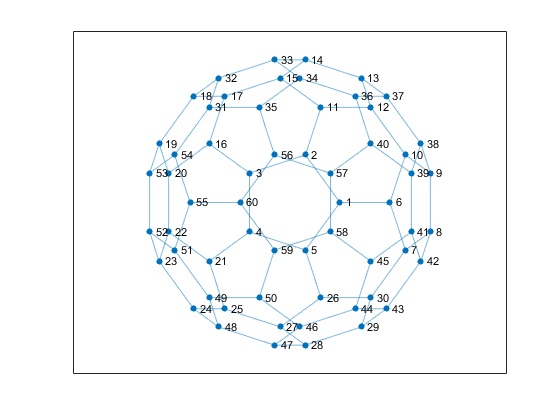

[Image source: Mathworks](https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png)

In [20]:
coordinates = {
    1: [2, 5, 6],
    2: [3, 11, 1],
    3: [4, 16, 2],
    4: [5, 21, 3],
    5: [26, 1, 4],
    6: [7, 10, 1],
    7: [8, 30, 6],
    8: [9, 42, 7],
    9: [10, 38, 8],
    10: [12, 6, 9],
    11: [12, 15, 2],
    12: [13, 10, 11],
    13: [14, 37, 12],
    14: [15, 33, 13],
    15: [17, 11, 14],
    16: [17, 20, 3],
    17: [18, 15, 16],
    18: [19, 32, 17],
    19: [20, 53, 18],
    20: [22, 16, 19],
    21: [22, 25, 4],
    22: [23, 20, 21],
    23: [24, 52, 22],
    24: [25, 48, 23],
    25: [27, 21, 24],
    26: [27, 30, 5],
    27: [28, 25, 26],
    28: [29, 47, 27],
    29: [30, 43, 28],
    30: [7, 26, 29],
    31: [32, 35, 54],
    32: [33, 18, 31],
    33: [34, 14, 32],
    34: [35, 36, 33],
    35: [56, 31, 34],
    36: [37, 40, 34],
    37: [38, 13, 36],
    38: [39, 9, 37],
    39: [40, 41, 38],
    40: [57, 36, 39],
    41: [42, 45, 39],
    42: [43, 8, 41],
    43: [44, 29, 42],
    44: [45, 46, 43],
    45: [58, 41, 44],
    46: [47, 50, 44], 
    47: [48, 28, 46], 
    48: [49, 24, 47], 
    49: [50, 51, 48], 
    50: [59, 46, 49], 
    51: [52, 55, 49], 
    52: [53, 23, 51], 
    53: [54, 19, 52], 
    54: [55, 31, 53], 
    55: [60, 51, 54], 
    56: [57, 60, 35], 
    57: [58, 40, 56], 
    58: [59, 45, 57], 
    59: [60, 50, 58], 
    60: [55, 56, 59]}

In [21]:
def fill_in_buckball_matrix(matrix_x, bucky_data):

    for c1, coord_list in bucky_data.items():
        for c2 in coord_list:
            matrix_x[c1-1, c2-1] = 1
    return matrix_x


In [28]:
blank_matrix = sp.coo_matrix((60, 60), shape=None, dtype=None, copy=False).toarray()

In [29]:
buck_matrix = fill_in_buckball_matrix(matrix_x= blank_matrix, bucky_data= coordinates)
print(buck_matrix)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [30]:
sc_buck = sc.csr_matrix(buck_matrix)
sc_buck.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

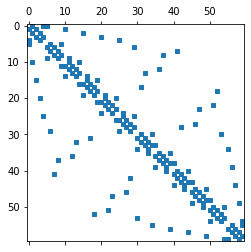

In [31]:
plt.spy(buck_ball_matrix, marker='s', markersize=4)
plt.show()

## Question 2
---
>- Write a Python function that returns the dominating eigenvalue-eigenvector pair of a given square matrix by using the power method. 

>- Create a second version of the code that does the same for a sparse matrix given in CSR format.

>- Generate a random sparse matrix $A$ of uniformly distributed random numbers between -1 and 1 of order $100 \times 100$ which is around 95% sparse.

>- Call these two functions and compare the time it takes to calculate the dominating eigen-pair of $A$. Report your observation.

In [287]:
def power_meth(A, iterrations):
    v1 = np.random.rand(A.shape[1])

    for k in range(iterrations):
        v2 = A.dot(v1)

        # Need to normalize
        v2 = v2 / np.linalg.norm(v2)
        v1 = v2
        
    evalue = np.dot(v2,A.dot(v2))/np.linalg.norm(v2)
    return v2, evalue

In [288]:
def power_meth_sparse(A, iterrations):
    v1 = np.random.rand(A.shape[1])

    for k in range(iterrations):
        v2 = A.dot(v1)

        # Need to normalize
        v2 = v2 / np.linalg.norm(v2)
        v1 = v2
        
    evalue = np.dot(v2,A.dot(v2))/np.linalg.norm(v2)
    return v2, evalue

In [289]:
iteration = 5000
sparse = 0.95
density = round(1-sparse, 2)
csr = sp.random(100, 100, density, format='csr', 
              data_rvs=lambda s: np.random.uniform(-1.0, 1.0, size=s))
array = W_csr.A


In [290]:
start = time.time()
dense_eigen_vector,dense_eigen_value = power_meth_sparse(csr, iteration)
dense_time = time.time() - start

start = time.time()
sparse_eigen_vector,sparse_eigen_value = power_meth(array, iteration)
sparse_time = time.time() - start

In [291]:
print ('dense_eigen_value: {}'.format(dense_eigen_value))
print ('dense_eigen_vector:{}'.format(dense_eigen_vector))
print ('sparse_eigen_value:{}'.format(sparse_eigen_value))
print ('sparse_eigen_vector:{}'.format(sparse_eigen_vector))

dense_eigen_value: 1.3792624263018185
dense_eigen_vector:[ 0.13504104  0.04145595 -0.01641404  0.09244922 -0.00299527  0.00820778
  0.1401058   0.08985557  0.03860126 -0.02602905  0.0454456  -0.23351624
  0.15493739 -0.09935334 -0.13317709  0.12814467 -0.00388876 -0.15526594
 -0.12977889  0.11287961 -0.08224197 -0.04435578  0.14965455  0.12596603
  0.09767941 -0.07325289  0.00682224 -0.16114569 -0.2191942   0.02846697
 -0.00230534 -0.10658104  0.13354165 -0.15436802  0.06151394  0.03417371
 -0.05731083 -0.15496359  0.00839047 -0.02834383  0.01465294  0.01771011
  0.08998964 -0.11018251  0.08632148  0.21047867  0.12037337 -0.0728229
  0.01071733  0.03909289  0.09756689  0.03504001 -0.02749104 -0.02660824
  0.14718375  0.03486861 -0.02529604  0.06666234 -0.00689991 -0.13567285
  0.07298863 -0.06676944  0.03863852  0.00136134  0.09356015 -0.22145349
 -0.07840933  0.09742525  0.02678745 -0.10900478  0.01138261 -0.00786998
  0.08408753  0.01562364 -0.15908252  0.15595926 -0.03312383  0.1711

In [293]:
print ('Time for Dense Power Method: {}'.format(dense_time ))
print ('Time for Sparse Power Method:{}'.format(sparse_time))
print('Difference: {}'.format(sparse_time-dense_time))

Time for Dense Power Method: 0.048891544342041016
Time for Sparse Power Method:0.03687787055969238
Difference: -0.012013673782348633


## We can tell from this that the sparse function is actually faster due to the fact that we are inputing a sparse matrix instead of the deanse matrix. We only inpoutted 5000 interations to finsd the eigen value but we can assume that the time difference will onle increase as we increase iterations.